# Scenario

As an analyst for OilyGiant mining company our task is to find the best place for a new well. 

We will use several techniques, including machine learning and bootstrapping, to select the region with the highest profit margin.

Machine learning prediction question: What is the predicted volume of reserves in thousand barrels for each region?

Target (response): product (volume of reserves in thousand barrels)

Useful Features (predictor variables): f0, f1, f2 unknown features important to analysis

Datasets: geo_data_0.csv, geo_data_1.csv, geo_data_2.csv

Analysis done December 2021

In [1]:
# import libraries

# sklearn used for basic machine learning
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics 
import pandas as pd
import numpy as np
import math
from scipy import stats as st
from numpy.random import RandomState
state = RandomState(12345) 

# import sys and insert code to ignore warnings 
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

# Step 1: Download and prepare the data

In [2]:
# load the data for region0
try:
    region0 = pd.read_csv('/datasets/geo_data_0.csv')
except:
    print('ERROR: Unable to find or access file.')
# load the data for region1
try:
    region1 = pd.read_csv('/datasets/geo_data_1.csv')
except:
    print('ERROR: Unable to find or access file.')
# load the data for region2
try:
    region2 = pd.read_csv('/datasets/geo_data_2.csv')
except:
    print('ERROR: Unable to find or access file.')

In [3]:
# create basic loop to get info on dfs
    
# create list of dfs
dfs = [region0, region1, region2]

for df in dfs:
    print('\n')
    print("=" * 23)
    name =[x for x in globals() if globals()[x] is df][0]
    print("Dataframe Name: %s" % name)
    print("=" * 23)
    print('Number of duplicate rows:', df.duplicated().sum())
    print('Number rows and columns:', df.shape, '\n')
    print("Count total NaN at each column in a DataFrame :")
    print(df.isnull().sum())



Dataframe Name: region0
Number of duplicate rows: 0
Number rows and columns: (100000, 5) 

Count total NaN at each column in a DataFrame :
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


Dataframe Name: region1
Number of duplicate rows: 0
Number rows and columns: (100000, 5) 

Count total NaN at each column in a DataFrame :
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


Dataframe Name: region2
Number of duplicate rows: 0
Number rows and columns: (100000, 5) 

Count total NaN at each column in a DataFrame :
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


# Observations on data

Each of the three data frames include
- **id**: unique oil well identifier
- **f0, f1, f2** unknown features important to analysis
- **product** volume of reserves in the oil well (thousand barrels)

There are no NaN / missing values in any dataframes.

There are no duplicate rows.

Each df is the same size, 5 columns and 100000 rows.

# Step 2: Train and test the model for each region
- 2.1 Split the data into a training set and validation set at a ratio of 75/25. 
- 2.2 Train the model and make predictions for the validation set. 
- 2.3 Save the predictions and correct answers for the validation set. 
- 2.4 Print the average volume of predicted reserves and model RMSE. 
- 2.5 Analyze the results.

We will create a method for the lr and calculations to minimize duplication of code. 

Then we will split each dataframe into train and valid and call the method.

In [4]:
# examine correlations since we will use linear regression
for df in dfs:
    print('\n')
    print("=" * 25)
    name = [x for x in globals() if globals()[x] is df][0]
    print("Correlations for: %s" % name)
    print("=" * 25)
    correlations = df.corr()
    print(correlations)



Correlations for: region0
               f0        f1        f2   product
f0       1.000000 -0.440723 -0.003153  0.143536
f1      -0.440723  1.000000  0.001724 -0.192356
f2      -0.003153  0.001724  1.000000  0.483663
product  0.143536 -0.192356  0.483663  1.000000


Correlations for: region1
               f0        f1        f2   product
f0       1.000000  0.182287 -0.001777 -0.030491
f1       0.182287  1.000000 -0.002595 -0.010155
f2      -0.001777 -0.002595  1.000000  0.999397
product -0.030491 -0.010155  0.999397  1.000000


Correlations for: region2
               f0        f1        f2   product
f0       1.000000  0.000528 -0.000448 -0.001987
f1       0.000528  1.000000  0.000779 -0.001012
f2      -0.000448  0.000779  1.000000  0.445871
product -0.001987 -0.001012  0.445871  1.000000


We note a strong correlation between f2 and region1 and moderate correlations between f2 and region0, region2. Also there is a moderate negative correlation between f1 and region0. 

In [5]:
def lr(df, X_train, X_valid, y_train, y_valid):
    """This method
    instantiates a linear regression model,
    fits/predicts using split data,
    calculates the average volume of target reserves,
    calculates the average volume of predicted reserves,
    calculates model coefficients,
    calculates model intercept,
    calculates R-2 Sqaured,
    calculates mean square error,
    calcuates root mean sqaure error,
    calculates percent error.
 
    Input Arguments: df, X_train, X_valid, y_train, y_valid.
    Returns: y_pred, y_pred_avg, y_valid, y_valid_avg, r2, mse, rmse, volumes, pct_error.
    """
    print('\n')
    print("=" * 23)
    name = [x for x in globals() if globals()[x] is df][0]
    print("Dataframe Name: %s" % name)
    print("=" * 23)
    print('\nVerify the shape of X (features) and y (target) for', name)
    print(X.shape, y.shape)  
    print('Verify size of divided df X_train, X_test, y_train, y_test\n'
      , X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

    # instantiate model
    model = LinearRegression()
    # train the model
    model.fit(X_train, y_train)
    # get predictions
    y_pred = model.predict(X_valid)
    # get avg prediction
    y_pred_avg = y_pred.mean()
    print('\nAverage volume of predicted reserves:', y_pred_avg)
    y_valid_avg = y_valid.mean()
    print('Average volume of target reserves:', y_valid.mean())

    # Parameters calculated by the model
    # coefficients indicate influence of parameters/features on pred volume
    print('\nCoefficients for columns', X.columns)
    coef0= model.coef_
    print(coef0)
    # model intercept indicates the base value, or where the line would cross y
    # without any influence of the parameters/features
    print('Model intercept', model.intercept_)
    
    # R-squared measures the fitness of the model
    correlation_matrix = np.corrcoef(y_pred, y_valid)
    correlation_xy = correlation_matrix[0,1]
    r2 = correlation_xy**2
    print('The R-squared value:', r2)
    
    # calculate root mean square error to check error
    mse = mean_squared_error(y_pred, y_valid)
    rmse = mse ** 0.5
    print('Mean squared error:', mse)
    stddev = (model.predict(X_valid) - y_valid).std()
    print('Standard deviation:', stddev)
    print('Root mean square error:', rmse)
    pct_error = "{:.0%}". format((rmse/y_valid_avg))
    print('Percent error of prediction from true values:', pct_error)
    
    return y_pred, y_pred_avg, y_valid, y_valid_avg, r2, mse, rmse, pct_error

In [6]:
# split 3 dfs into train and valid (75/25)

X = region0.iloc[:, 1:-1] # all rows and all cols except first and last
y = region0.iloc[:, -1].values# all rows and last column
X_train0, X_valid0, y_train0, y_valid0 = train_test_split(X, y, test_size=0.25, random_state=42)

X = region1.iloc[:, 1:-1] # all rows and all cols except first and last
y = region1.iloc[:, -1].values # all rows and last column
X_train1, X_valid1, y_train1, y_valid1 = train_test_split(X, y, test_size=0.25, random_state=42)

X = region2.iloc[:, 1:-1] # all rows and all cols except first and last
y = region2.iloc[:, -1].values # all rows and last column
X_train2, X_valid2, y_train2, y_valid2 = train_test_split(X, y, test_size=0.25, random_state=42)

In [7]:
# call lr method on 3 dfs
y_pred0, y_pred_avg0, y_valid0, y_valid_avg0, r20, mse0, rmse0, pct_e0 = lr(region0, X_train0, X_valid0, y_train0, y_valid0)
y_pred1, y_pred_avg1, y_valid1, y_valid_avg1, r21, mse1, rmse1, pct_e1 = lr(region1, X_train1, X_valid1, y_train1, y_valid1)
y_pred2, y_pred_avg2, y_valid2, y_valid_avg2, r22, mse2, rmse2, pct_e2 = lr(region2, X_train2, X_valid2, y_train2, y_valid2)




Dataframe Name: region0

Verify the shape of X (features) and y (target) for region0
(100000, 3) (100000,)
Verify size of divided df X_train, X_test, y_train, y_test
 (75000, 3) (25000, 3) (75000,) (25000,)

Average volume of predicted reserves: 92.39879990657768
Average volume of target reserves: 92.32595637084387

Coefficients for columns Index(['f0', 'f1', 'f2'], dtype='object')
[  3.83225372 -14.26047297   6.59357294]
Model intercept 77.66624978042196
The R-squared value: 0.27283555237229334
Mean squared error: 1425.5608700093812
Standard deviation: 37.75653008194321
Root mean square error: 37.75660035026169
Percent error of prediction from true values: 41%


Dataframe Name: region1

Verify the shape of X (features) and y (target) for region1
(100000, 3) (100000,)
Verify size of divided df X_train, X_test, y_train, y_test
 (75000, 3) (25000, 3) (75000,) (25000,)

Average volume of predicted reserves: 68.71287803913764
Average volume of target reserves: 68.72538074722745

Coeffici

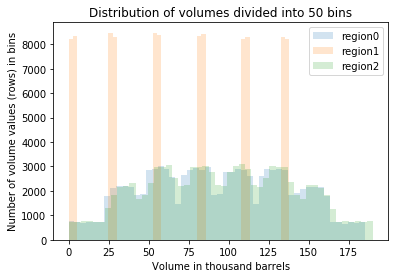

In [8]:
plt.hist(region0['product'], alpha=.2, bins=50);
plt.hist(region1['product'],alpha=.2,bins=50);
plt.hist(region2['product'],alpha=.2,bins=50);
plt.legend(['region0', 'region1', 'region2'])
plt.title("Distribution of volumes divided into 50 bins")
plt.ylabel("Number of volume values (rows) in bins")
plt.xlabel("Volume in thousand barrels")
plt.show()

In [9]:
# put values in table
compare = pd.DataFrame({'Volume': ['Avg Predicted (thousands of barrels)', 'Avg Target (thousands of barrels)'
                                   , 'R-Squared', 'RMSE', 'Percent error from true values'],
                         'region0': [y_pred_avg0, y_valid_avg0, r20, rmse0, pct_e0],
                         'region1': [y_pred_avg1, y_valid_avg1, r21, rmse1, pct_e1],
                         'region2': [y_pred_avg2, y_valid_avg2, r22, rmse2, pct_e2] })
compare.set_index('Volume', inplace=True)
compare

,region0,region1,region2
Volume,,,
Avg Predicted (thousands of barrels),92.3988,68.7129,94.771
Avg Target (thousands of barrels),92.326,68.7254,95.151
R-Squared,0.272836,0.999625,0.196422
RMSE,37.7566,0.89028,40.1459
Percent error from true values,41%,1%,42%


We note the best linear regression results with region1. The R^2 value is very close to 1, with 1 being ideal, RMSE is low as a percentage of the average volume in thousand barrels. The average predicted and average true volume is substantially lower than the volumes for region0 and region2. 

While region0 and region2 enjoy higher average predicted and true volume in thousand barrels, both perform poorly with linear regression (having a low R^2, a high RMSE, and a horrible percent error over 40%).

It is interesting to note that when we divide the regions into 50 bins and plot counts of volume by volume, region1 appears to cluster in 6 main groups while region0 and region2 demonstrate more normal distribution. This could be an area for future investigtion, to see if those volume clusters correlate with a specific characteristic in the region. If we knew that data, we could recommend, with very high probability, OilyGiant select new wells in region1 with the characteristics associated with the 2 high volume clusters.

# Step 3: Prepare for profit calculation
- 3.1 Store all key values for calculations in separate variables.
- 3.2 Calculate the volume of reserves sufficient for developing a new well without losses. Compare the obtained value with the average volume of reserves in each region. 
- 3.3 Provide the findings about the preparation for profit calculation step.

In [10]:
# store values, calculate volume of reserves to avoid losses

n = 500 # oilwells
n_best = 200 # oilwells
revenue_per_barrel = 4.5 # USD
revenue_per_unit = 4500 # USD, unit is 1000 barrels
budget_200_oil_wells = 100_000_000.00 # dollars # 100 USD million
n_budget = 200 # oilwells in budget total
unit = 1000 # barrels
max_loss = 0.025

min_volume_of_reserves = budget_200_oil_wells/n_budget/revenue_per_unit
print('The minimum volume of reserves sufficient for developing'
     +'\na new well without losses:', round(min_volume_of_reserves,2), 'in thousands of barrels')
print('\nThe predicted and true target of the average volume of reserves in all 3 '
      '\nregions are lower', (round(y_pred_avg0,2), round(y_pred_avg1,2), round(y_pred_avg2,2))
     ,'but 2 have values that are close.')

The minimum volume of reserves sufficient for developing
a new well without losses: 111.11 in thousands of barrels

The predicted and true target of the average volume of reserves in all 3 
regions are lower (92.4, 68.71, 94.77) but 2 have values that are close.


# Step 4: Write a function to calculate profit from a set of selected oil wells and model predictions
- 4.1 Pick the wells with the highest values of predictions. The number of wells depends on the budget and cost of developing one oil well.
- 4.2 Summarize the target volume of reserves in accordance with these predictions
- 4.3 Provide findings: suggest a region for oil wells' development and justify the choice. Calculate the profit for the obtained volume of reserves.


In [11]:
# sample the predicted wells with the highest volumes
# calculate the sum of the corresponding actual volumes
# calculate the profit: 
# (volume of wells in thousand barrels * revenue) - budget

def revenue(target, predicted, count):
    indices = predicted.sort_values(ascending=False).index
    return target[indices][:count].sum() * revenue_per_unit - budget_200_oil_wells

# Step 5: Calculate risks and profit for each region
- 5.1 Use the bootstrap technique with 1000 samples to find the distribution of profit.
- 5.2 Find average profit, 95% confidence interval and risk of losses. Loss is negative profit.
- 5.3 Provide findings: suggest a region for development of oil wells and justify the choice.

In [12]:
# bootstrap method

def revenue_bs(target, predicted):
    values = []
    target = pd.Series(target)
    predicted = pd.Series(predicted)
    for i in range(1000):
        target_sample = target.sample(n=n, replace=True, random_state=state)
        values.append(revenue(target_sample, predicted[target_sample.index], n_best))
    return pd.Series(values)

In [13]:
revenues0 = revenue_bs(y_valid0, y_pred0)
revenues1 = revenue_bs(y_valid1, y_pred1)
revenues2 = revenue_bs(y_valid2, y_pred2)

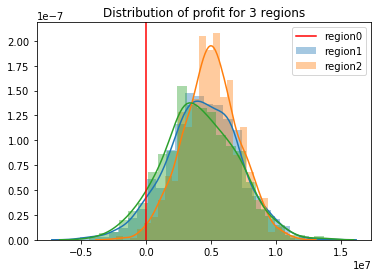

In [14]:
sns.distplot(revenues0)
sns.distplot(revenues1)
sns.distplot(revenues2)
plt.axvline(0, c="r", label="")
plt.legend(['region0', 'region1', 'region2'])
plt.title("Distribution of profit for 3 regions")
plt.show()

The bootstrap technique shows all 3 regions show high profitability, but also some risk of loss. Now we will check out the confidence intervals.

In [15]:
def ci(df, revenue):
    print('\n')
    print("=" * 28)
    name = [x for x in globals() if globals()[x] is df][0]
    print("Confidence Interval: %s" % name)
    print("=" * 28)
    avg_profit = revenue.mean().round(2)
    ci = st.t.interval(0.95, len(revenue)-1, revenue.mean(), revenue.sem())
    loss_risk = "{:.2%}". format(len(revenue[revenue < 0]) / len(revenue))
    print('Average profit:', avg_profit)
    print('95% confidence interval:', ci)
    print('Risk of losses:', loss_risk)

ci(region0, revenues0)
ci(region1, revenues1)
ci(region2, revenues2)



Confidence Interval: region0
Average profit: 4359337.72
95% confidence interval: (4187611.0388268763, 4531064.403946367)
Risk of losses: 6.10%


Confidence Interval: region1
Average profit: 4985690.17
95% confidence interval: (4852765.914485457, 5118614.42385031)
Risk of losses: 1.00%


Confidence Interval: region2
Average profit: 4126728.99
95% confidence interval: (3948992.6895080507, 4304465.290262587)
Risk of losses: 7.00%


Only one of our regions has a risk of loss less than the specified 2.5%, so we will recommend region1. We feel confident in our recommendation because region1 also performed well with the linear regression model, has a very low RMSE and a R^2 value close to one.

# References
[How to print out name of dataframe](https://stackoverflow.com/questions/41684553/print-dataframe-name/41684840)